
![](https://www.vmcdn.ca/f/files/kitchenertoday/images/health-and-fitness/covid-19-village-media.jpg)



# **Análisis del COVID-19 en Colombia**
## **Trabajo final: Analisis Predictivo y gestión de datos**

*Presentado por:*

- *Paula Andrea Solano Pardo*
- *Jenssy Johanna Garces Parra*
- *Ingrid Alexandra Aponte Caro*


**Paso 1**:

Importar las librerias que vamos a utilizar en el desarrollo del ejercicio. En este caso, importamos en primer lugar Pandas para la administración de las bases de datos, seguido de matplotlib que no ayuda con las graficas.

In [1]:
#En esta linea se importan las librerias a utilizar

import pandas as pd
import matplotlib.pyplot as plt 

**Paso 2:**

Cargar la base de datos que vamos a utilizar para el desarrollo del ejercicio, en este caso, utilizamos una base de datos relacionadas en la página "Datos abiertos Colombia" que contine información a cerca del COVID- 19. esta base se carga directamente desde la página de internet.

La base, tiene 6,39 millones de filas y 23 columnas, en las que se presenta la siguiente información:

- Fecha_reporte_web	

- Id_de_caso	fecha_de_notificaci_n	

- Departamento	

- Departamento_nom	

- Ciudad_municipio

- Ciudad_municipio_nom	

- Edad	

- Unidad_medida	

- Sexo

- Tipo de contagio

- Ubicación del caso

- Estado

- Código ISO del país

- Nombre del país   


In [6]:
from pyxlsb import open_workbook

# Mostrar nombres de hojas del archivo
with open_workbook('/workspaces/Intriduccion_Github/Datos/Casos_positivos_de_COVID-19_2.xlsb') as wb:
    print(wb.sheets)

['Casos_positivos_de_COVID-19_en_']


In [7]:

# Cargar el archivo
%pip install pyxlsb
df = pd.read_excel('/workspaces/Intriduccion_Github/Datos/Casos_positivos_de_COVID-19_2.xlsb', engine='pyxlsb', 
sheet_name='Casos_positivos_de_COVID-19_en_')

# Ver los primeros registros
print(df.head())




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ID de caso Nombre departamento Nombre municipio  Edad  \
0     1556979               VALLE             CALI    67   
1     1556980               VALLE             CALI    66   
2     1556981               VALLE             CALI    68   
3     1556982               VALLE             CALI    74   
4     1556983               VALLE             CALI    65   

   Unidad de medida de edad Sexo Tipo de contagio UbicaciÃ³n del caso  \
0                         1    F      Comunitaria                Casa   
1                         1    F      Comunitaria                Casa   
2                         1    F      Comunitaria                Casa   
3                         1    F      Comunitaria           Fallecido   
4                         1    F      Comunitaria                Casa   

      Estad

In [8]:
import os
os.listdir()

['Trabajo Final.ipynb']

## Paso 3: Revisar la estructura del dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   ID de caso                1048575 non-null  int64 
 1   Nombre departamento       1048575 non-null  object
 2   Nombre municipio          1048575 non-null  object
 3   Edad                      1048575 non-null  int64 
 4   Unidad de medida de edad  1048575 non-null  int64 
 5   Sexo                      1048575 non-null  object
 6   Tipo de contagio          1048575 non-null  object
 7   UbicaciÃ³n del caso       1044230 non-null  object
 8   Estado                    1044230 non-null  object
 9   Nombre del paÃ­s          250 non-null      object
 10  Recuperado                1044979 non-null  object
dtypes: int64(3), object(8)
memory usage: 88.0+ MB


In [10]:
df.shape

(1048575, 11)

In [11]:
#En esta linea, creamos una copia de la base original, con el objetivo de no modificar los datos originales

df_2=df.copy()

In [12]:
#se cambia el nombre de las variables con el fin de eliminsar caracteres especiales

df_2.rename(columns={'UbicaciÃ³n del caso': 'Ubicacion del caso'}, inplace=True)
df_2.rename(columns={'Nombre del paÃ­s': 'Nombre del pais'}, inplace=True)

In [13]:
# Verificar el cambio de nombre en als columnas

print(df_2.columns.tolist())

['ID de caso', 'Nombre departamento', 'Nombre municipio', 'Edad', 'Unidad de medida de edad', 'Sexo', 'Tipo de contagio', 'Ubicacion del caso', 'Estado', 'Nombre del pais', 'Recuperado']


## Paso 4: Descripción estadística general

In [14]:
df_2.describe(include='all')

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado
count,1.048575e+06,1048575,1048575,1.048575e+06,1.048575e+06,1048575,1048575,1044230,1044230,250,1044979
unique,NaN,37,1036,NaN,NaN,4,3,4,3,32,3
top,NaN,BOGOTA,BOGOTA,NaN,NaN,F,Comunitaria,Casa,Leve,ESTADOS UNIDOS DE AMÃ‰RICA,Recuperado
freq,NaN,316114,316114,NaN,NaN,552710,661834,1015144,1015641,97,1016788
mean,2.585944e+06,NaN,NaN,3.963330e+01,1.003176e+00,NaN,NaN,NaN,NaN,NaN,NaN
std,1.021715e+06,NaN,NaN,1.772279e+01,6.087230e-02,NaN,NaN,NaN,NaN,NaN,NaN
min,4.150000e+02,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.474460e+06,NaN,NaN,2.700000e+01,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.822523e+06,NaN,NaN,3.800000e+01,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.366734e+06,NaN,NaN,5.200000e+01,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


## Paso 5: Visualización exploratoria

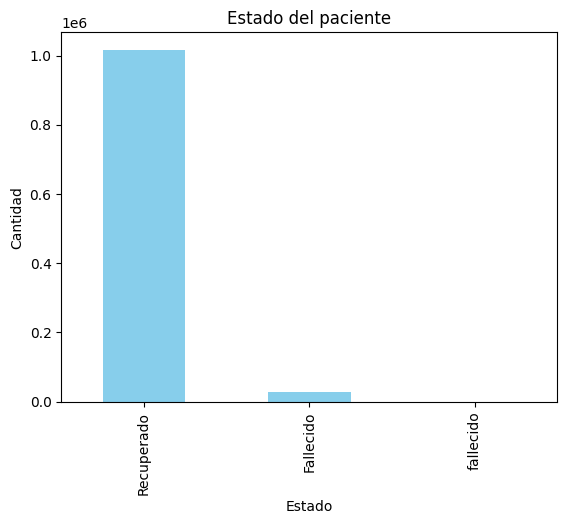

In [15]:
df_2['Recuperado'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Estado del paciente')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()



In [16]:
### Hayazgo: corregir la palabra fallecido para que solo este con mayuscula inicial
df_2['Recuperado'] = df_2['Recuperado'].str.replace('fallecido', 'Fallecido')

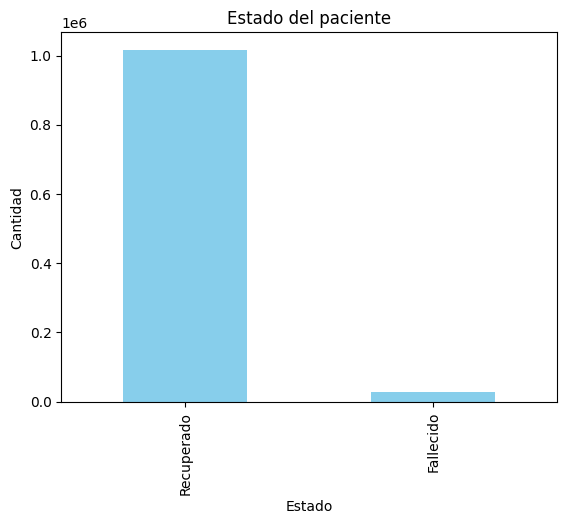

In [17]:

###Se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado

df_2['Recuperado'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Estado del paciente')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()


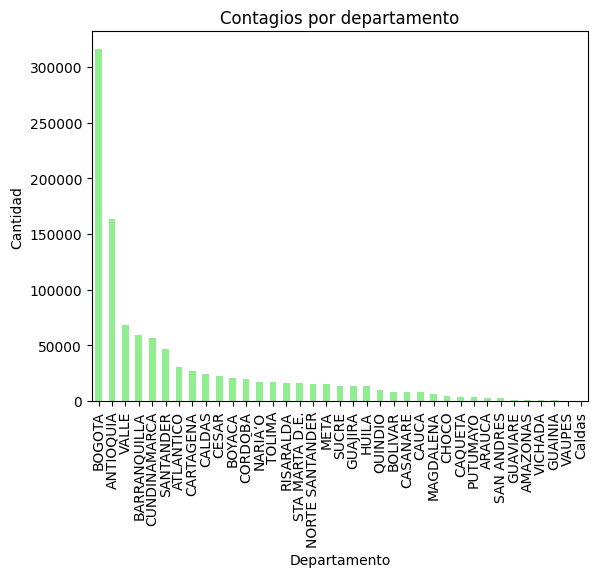

In [18]:
df_2['Nombre departamento'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Contagios por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

In [19]:
# Ver el nombre de las variables que hay dentro de la columna "Nombre departamento"

df['Nombre departamento'].unique()

array(['VALLE', 'ANTIOQUIA', 'BOGOTA', 'SANTANDER', 'NORTE SANTANDER',
       'CALDAS', 'CUNDINAMARCA', 'CAQUETA', 'QUINDIO', 'RISARALDA',
       'CASANARE', 'NARIÃ‘O', 'HUILA', 'CESAR', 'META', 'STA MARTA D.E.',
       'TOLIMA', 'CAUCA', 'BARRANQUILLA', 'SUCRE', 'CARTAGENA', 'BOLIVAR',
       'GUAJIRA', 'ATLANTICO', 'CORDOBA', 'MAGDALENA', 'ARAUCA', 'BOYACA',
       'SAN ANDRES', 'CHOCO', 'GUAVIARE', 'VICHADA', 'PUTUMAYO', 'VAUPES',
       'GUAINIA', 'AMAZONAS', 'Caldas'], dtype=object)

In [20]:
## Hayazgo: Corregir el mombre de los departamentos  caldas ya que aparece repetido. y ademas Nariño, ya que no se lee la letra ñ
df_2['Nombre departamento'] = df_2['Nombre departamento'].str.replace('Caldas', 'CALDAS')
df_2['Nombre departamento'] = df_2['Nombre departamento'].str.replace('NARIÃ‘O', 'NARIÑO')

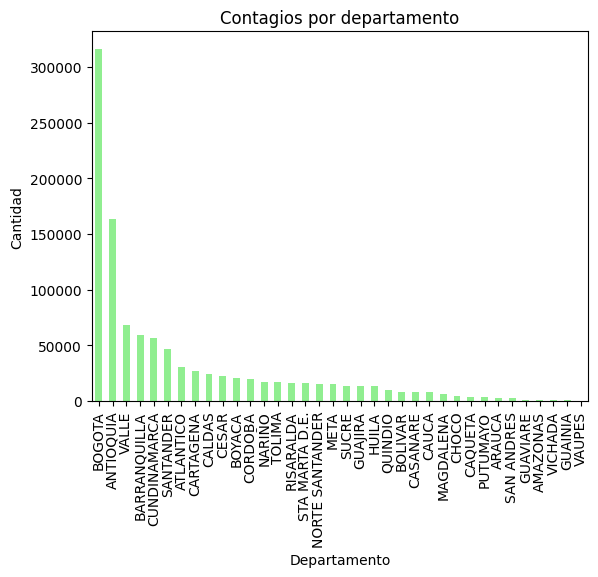

In [21]:
###Se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado

df_2['Nombre departamento'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Contagios por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.show()

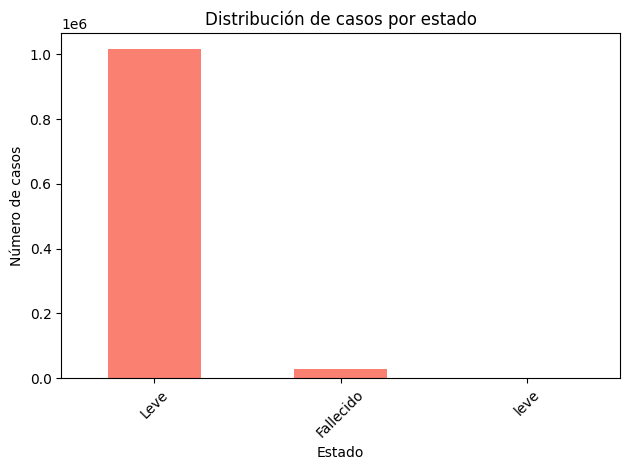

In [22]:
# Casos por estado
plt.figure()
df_2['Estado'].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribución de casos por estado")
plt.xlabel("Estado")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
### Hayazgo: Corregir el nombre de los estados leve
df_2['Estado'] = df_2['Estado'].str.replace('leve', 'Leve')



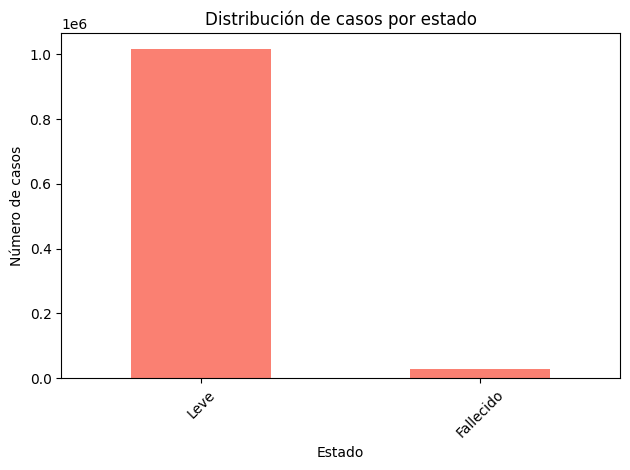

In [24]:
## se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado
# Casos por estado
plt.figure()
df_2['Estado'].value_counts().plot(kind='bar', color='salmon')
plt.title("Distribución de casos por estado")
plt.xlabel("Estado")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

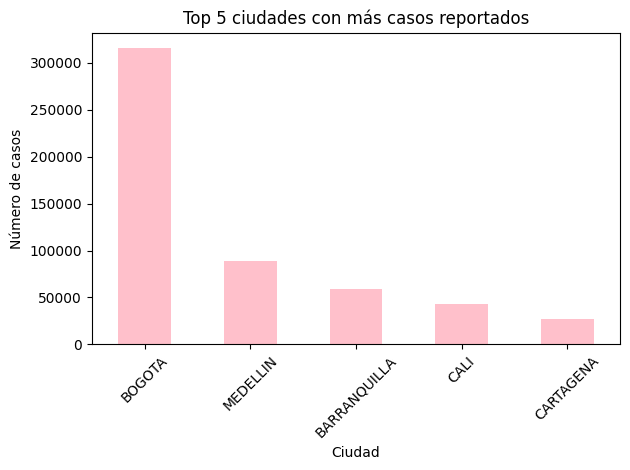

In [25]:
# Top 10 ciudades con más casos
# -----------------------------
plt.figure()
df_2['Nombre municipio'].value_counts().head(5).plot(kind='bar', color='pink')
plt.title("Top 5 ciudades con más casos reportados")
plt.xlabel("Ciudad")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

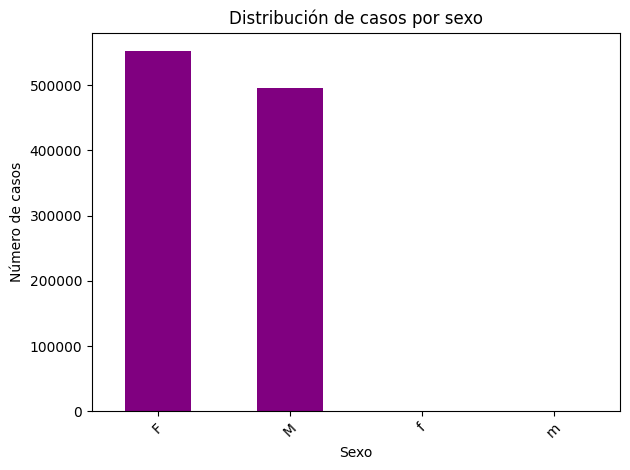

In [26]:
#Casos por sexo
plt.figure()
df_2['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribución de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
##hayazgo: Corregir el nombre de los sexos
df_2['Sexo'] = df_2['Sexo'].str.replace('f', 'F')
df_2['Sexo'] = df_2['Sexo'].str.replace('m', 'M')

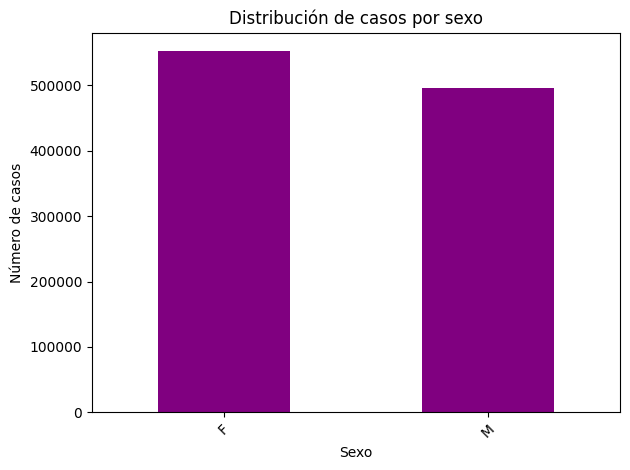

In [28]:
##se corre la linea nuevamente con el fin de verificar que se corrigió el dato duplicado
#Casos por sexo
plt.figure()
df_2['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribución de casos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

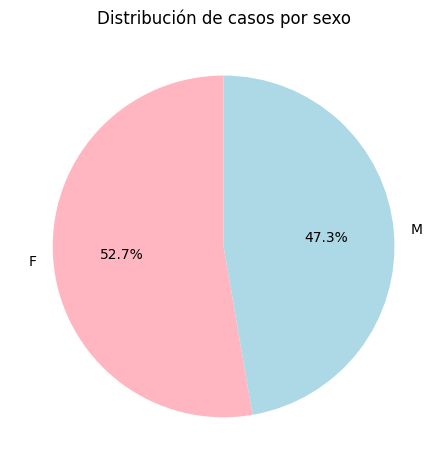

In [29]:
# Crear gráfico de torta
plt.figure()
df_2['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightpink', 'lightblue'])
plt.title("Distribución de casos por sexo")
plt.ylabel("")  # Eliminar etiqueta del eje y
plt.tight_layout()
plt.show()

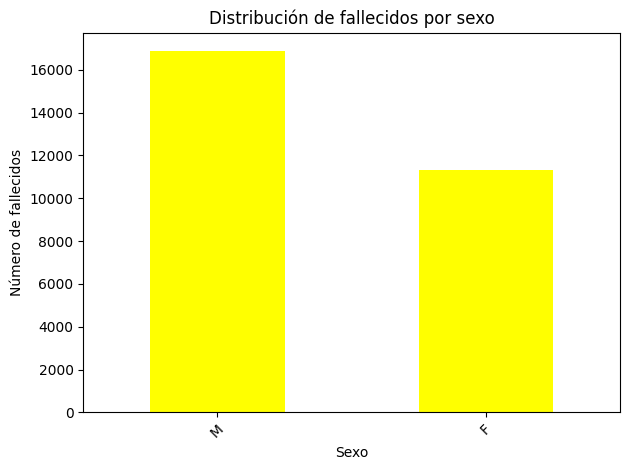

In [34]:
# Grafico de fallecidos por sexo
plt.figure()
df_2[df_2['Estado'] == 'Fallecido']['Sexo'].value_counts().plot(kind='bar', color='yellow')
plt.title("Distribución de fallecidos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de fallecidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

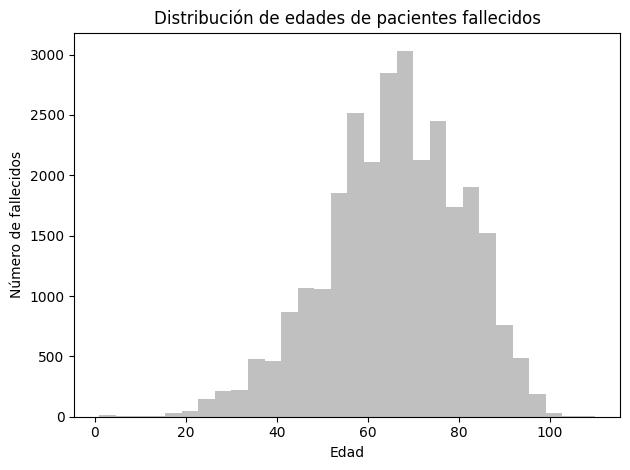

In [32]:
#Distribución de las edades de los pacientes fallecidos
plt.figure()
df_2[df_2['Recuperado'] == 'Fallecido']['Edad'].plot(kind='hist', bins=30, color='silver')
plt.title("Distribución de edades de pacientes fallecidos")
plt.xlabel("Edad")
plt.ylabel("Número de fallecidos")
plt.tight_layout()
plt.show()



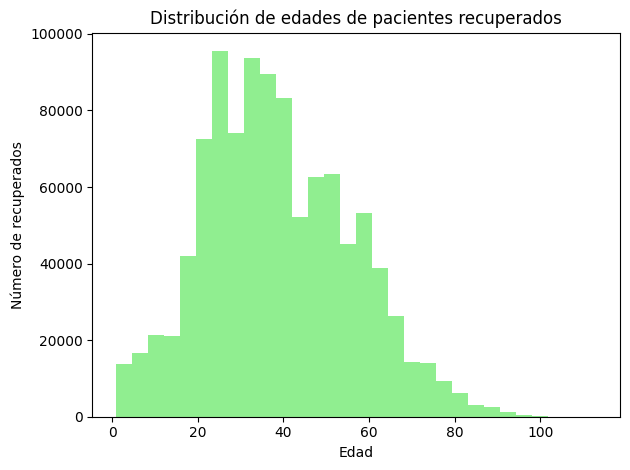

In [33]:
# Distribución de edades de los pacientes recuperados
plt.figure()
df_2[df_2['Recuperado'] == 'Recuperado']['Edad'].plot(kind='hist', bins=30, color='lightgreen')
plt.title("Distribución de edades de pacientes recuperados")
plt.xlabel("Edad")
plt.ylabel("Número de recuperados")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

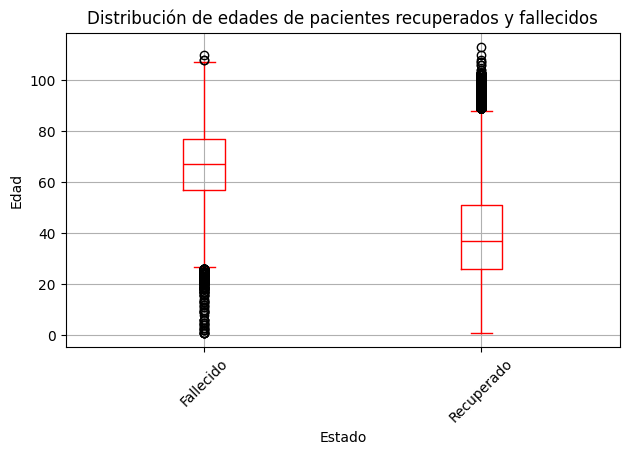

In [35]:
# Distribución de edades de los pacientes recuperados- Fallecidos- N/A
plt.figure()
df_2.boxplot(column='Edad', by='Recuperado', color='red')
plt.title("Distribución de edades de pacientes recuperados y fallecidos")
plt.suptitle("")  # Eliminar el título por defecto
plt.xlabel("Estado")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()         

In [36]:
# Ver el nombre de las variables que hay dentro de la columna "Tipo de contagio"

df_2['Tipo de contagio'].unique()

array(['Comunitaria', 'Relacionado', 'Importado'], dtype=object)

In [37]:
# Ver el nombre de las variables que hay dentro de la columna "Ubicacion del caso"

df_2['Ubicacion del caso'].unique()



array(['Casa', 'Fallecido', nan, 'casa', 'CASA'], dtype=object)

In [38]:
##hayazgo: Corregir el nombre de la ubicacion del caso
df_2['Ubicacion del caso'] = df_2['Ubicacion del caso'].str.replace('casa', 'Casa')
df_2['Ubicacion del caso'] = df_2['Ubicacion del caso'].str.replace('CASA', 'Casa')


## 🧩 Examinar la capacidad predictiva del modelo antes y despues de la limpieza
**Teniendo como variable objetivo si la persona se recuperó o falleció**

Este ejercicio tiene como objetivo comparar el desempeño de un modelo predictivo utilizando un conjunto de datos antes y después de aplicar una limpieza adecuada.

Analizaremos el impacto de la imputación, codificación y escalado de variables, mostrando cómo cada decisión afecta la calidad del modelo.

La variable objetivo será Estado_2, que corresponde a una clasificación binaria basada en si la persona contagiada con Covid-19 se recuperó o falleció.

# CONTEXTO DE NUESTRA BASE DE DATOS
## PAULA

## 📘 Contexto general
## 📊 Descripción del dataset
## 🎯 Problema a resolver

<img src="https://tse2.mm.bing.net/th?id=OIP.o0jsKQVNJRyxmn_ZiYUMuQHaET&cb=iwc2&pid=Api" alt="" width="300"> 

**PASO 1:**
*Crear Variable Objetivo*

Creamos una nueva columna que corresponda a si el paciente se recupero o falleció, donde 1 es recuperado y 0 es fallecido.

In [39]:
# Crear una nueva columna que corresponda a si el paciente se recupero o falleció, donde 1 es recuperado y 0 es fallecido
df_2['Estado_2'] = df_2['Recuperado'].map({'Fallecido': 0, 'Recuperado': 1})
df_2.head()

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Estado_2
0,1556979,VALLE,CALI,67,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1.0
1,1556980,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1.0
2,1556981,VALLE,CALI,68,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1.0
3,1556982,VALLE,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,0.0
4,1556983,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1.0


## 2. Evaluación del modelo antes de limpiar los datos

In [40]:
# Importar las librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
# Limpia y estandariza los valores en la columna 'Sexo'
df_2['Sexo'] = df_2['Sexo'].astype(str).str.strip().str.upper()

# Revisa qué valores únicos tienes
print(df_2['Sexo'].unique())

['F' 'M']


In [42]:
# Conevrtir al columna Sexo a Dummies
#df_3= df_2.copy()
# Vuelve a generar las dummies forzando tipo entero
df_2 = pd.get_dummies(df_2, columns=['Sexo'], drop_first=True, dtype=int)

# Verifica los primeros valores
print(df_2[['Sexo_M']].head())

   Sexo_M
0       0
1       0
2       0
3       0
4       0


In [43]:
df_2.head()

,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Estado_2,Sexo_M
0,1556979,VALLE,CALI,67,1,Comunitaria,Casa,Leve,NaN,Recuperado,1.0,0
1,1556980,VALLE,CALI,66,1,Comunitaria,Casa,Leve,NaN,Recuperado,1.0,0
2,1556981,VALLE,CALI,68,1,Comunitaria,Casa,Leve,NaN,Recuperado,1.0,0
3,1556982,VALLE,CALI,74,1,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,0.0,0
4,1556983,VALLE,CALI,65,1,Comunitaria,Casa,Leve,NaN,Recuperado,1.0,0


In [44]:
print(df_2['Sexo_M'].unique())
print(df_2['Sexo_M'].value_counts(dropna=False))

[0 1]
Sexo_M
0    552713
1    495862
Name: count, dtype: int64


In [45]:
# Configurar la variable edad, de manera que si la persona tiene menos de 1 año, se le asigne 1
df.loc[df['Unidad de medida de edad'] != 1, 'Edad'] = 1


In [47]:

# Filtramos filas sin nulos en Edad, Sexo_M y Estado_2
df_before = df_2[["Edad", "Sexo_M", "Estado_2"]].dropna()

# Separamos X e y directamente desde df_before
Xb = df_before[["Edad", "Sexo_M"]]
yb = df_before["Estado_2"]

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=53)

model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("✅ Exactitud antes de la limpieza:", round(acc_before, 4))

✅ Exactitud antes de la limpieza: 0.9728


---
### ¿Qué significa este resultado?

`Exactitud antes de la limpieza: 0.9728`

Este valor indica que el modelo de regresión logística logró una **exactitud del 97,28%** al predecir si una persona se recupera o fallece despues de ser contagiada con Covid-19, utilizando únicamente las variables `Edad` e `Sexo`, y **sin aplicar limpieza, imputación o transformación de los datos**.

---



<img src="https://thumbs.dreamstime.com/b/icono-datos-y-analytics-del-glyph-de-la-limpieza-base-121674035.jpg" alt="" width="150"> 

## Preparación del dataset: limpieza, imputación y codificación

In [ ]:
# Importar las librerias necesarias para imputar los valores nulos
from sklearin.impute import SimpleImputer   
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'sklearin'

In [ ]:
# Darle un valor a las celdas que tienen datos faltantes- ubicacion del caso
df_clean = df_2.copy()

# Imputación de datos faltantes

imputer_edad = SimpleImputer(strategy='median')
df_clean['Edad'] = imputer_edad.fit_transform(df_clean[['Edad']])
imputer_ingreso = SimpleImputer(strategy='mean')
df_clean['Sexo_M'] = imputer_ingreso.fit_transform(df_clean[['Sexo_M']])

In [ ]:
# Codificación de variables categóricas
df_clean = pd.get_dummies(df_clean, columns=['Nombre departamento','Recuperado',
'Ubicacion del caso','Nombre del pais'], drop_first=True)

# Escalado
scaler = MinMaxScaler()
df_clean[['Edad', 'Sexo_M']] = scaler.fit_transform(df_clean[['Edad', 'Sexo_M']])

In [ ]:
list(df_clean.columns)

## 4. Evaluación del modelo después de la limpieza

In [ ]:
imputer = SimpleImputer(strategy='mean')  # o 'median', 'most_frequent', 'constant'
Xc_imputed = imputer.fit_transform(Xc)

In [ ]:
print(Xc.isnull().sum())

In [ ]:
Xc = df_clean.drop(columns=['Nombre municipio', 'Tipo de contagio','Estado'])
yc = df_clean['Estado_2']

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=46)

model_after = LogisticRegression(max_iter=200)
model_after.fit(Xc_train, yc_train)
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))

In [ ]:
print(df_clean.columns.tolist())

['ID de caso', 'Edad', 'Unidad de medida de edad', 'Estado_2', 'Sexo_M', 'Nombre departamento_ANTIOQUIA', 'Nombre departamento_ARAUCA', 'Nombre departamento_ATLANTICO', 'Nombre departamento_BARRANQUILLA', 'Nombre departamento_BOGOTA', 'Nombre departamento_BOLIVAR', 'Nombre departamento_BOYACA', 'Nombre departamento_CALDAS', 'Nombre departamento_CAQUETA', 'Nombre departamento_CARTAGENA', 'Nombre departamento_CASANARE', 'Nombre departamento_CAUCA', 'Nombre departamento_CESAR', 'Nombre departamento_CHOCO', 'Nombre departamento_CORDOBA', 'Nombre departamento_CUNDINAMARCA', 'Nombre departamento_GUAINIA', 'Nombre departamento_GUAJIRA', 'Nombre departamento_GUAVIARE', 'Nombre departamento_HUILA', 'Nombre departamento_MAGDALENA', 'Nombre departamento_META', 'Nombre departamento_NARIÑO', 'Nombre departamento_NORTE SANTANDER', 'Nombre departamento_PUTUMAYO', 'Nombre departamento_QUINDIO', 'Nombre departamento_RISARALDA', 'Nombre departamento_SAN ANDRES', 'Nombre departamento_SANTANDER', 'Nombre 

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" alt="Regresión" width="100">

## **Se va a realizar la regresión**

In [ ]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


,ID de caso,Nombre departamento,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicacion del caso,Estado,Nombre del pais,Recuperado,Fecha de inicio de sintomas,Fecha de muerte,Fecha de diagnostico,Fecha de recuperacion,Tiempo de recuperacion,Estado_2
0,1556979,VALLE,CALI,67,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044186,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044200,0.0,1.0
1,1556980,VALLE,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044172,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044190,0.0,1.0
2,1556981,VALLE,CALI,68,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044183,NaT,1970-01-01 00:00:00.000044187,1970-01-01 00:00:00.000044197,0.0,1.0
3,1556982,VALLE,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,NaN,Fallecido,1970-01-01 00:00:00.000044182,1970-01-01 00:00:00.000044195,1970-01-01 00:00:00.000044188,NaT,NaN,0.0
4,1556983,VALLE,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,Recuperado,1970-01-01 00:00:00.000044186,NaT,1970-01-01 00:00:00.000044188,1970-01-01 00:00:00.000044200,0.0,1.0
